In [1]:
#TS_CFAR

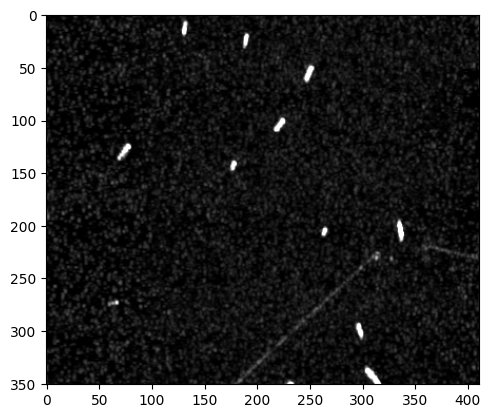

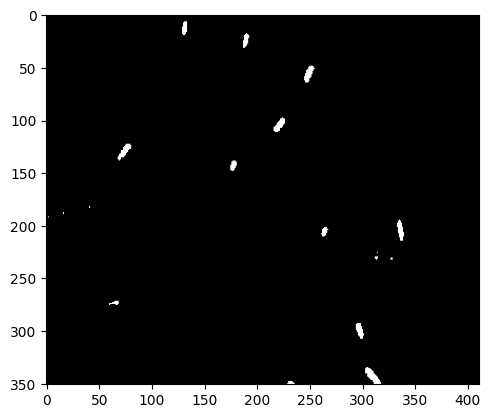

Detected targets: 788


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from tkinter import filedialog
from tkinter import Tk
import cv2
# from scipy.special import psi



# Initialisations
back_size = 30  # background band size (RADIAL)
guard_size = 10  # guard band size (RADIAL)
PFA = 0.001  # desired Probability of False Alarm
detections = 0  # initialise detection count

# Read Image
root = Tk()
root.withdraw()
filename = filedialog.askopenfilename()
img = io.imread(filename, as_gray=True)  # Read as a grayscale image
img = img / np.max(img)  # Normalize the image like im2double in MATLAB
plt.figure(), plt.imshow(img, cmap='gray')
img_ext = cv2.copyMakeBorder(img, back_size, back_size, back_size, back_size, cv2.BORDER_REFLECT)  # Extended image
h, l = img.shape
TH = np.zeros((h, l))

maskimg = np.zeros_like(img)  # Initialize maskimg as a matrix of zeros with the same shape as img

# Apply through image
for i in range(h):  # swapped l and h around - NOTE!
    for j in range(l):
        ii = i + back_size
        jj = j + back_size
        cut = img[i, j]
        
        # Get Bands
        guardband = img_ext[ii-guard_size:ii+guard_size+1, jj-guard_size:jj+guard_size+1]
        background = img_ext[ii-back_size:ii+back_size+1, jj-back_size:jj+back_size+1]
        background[(back_size-guard_size):(back_size+guard_size+1), (back_size-guard_size):(back_size+guard_size+1)] = np.nan  # Remove CUT and GUARD
        re_back = background.flatten()  # Reshape for calc
        
        # Truncated Statistics CFAR
        sample_mean = np.nanmean(re_back)
        trunc_thresh = 0.75 * np.nanmax(re_back)
        trunc_sample = np.copy(re_back)  # Copy
        trunc_sample[trunc_sample > trunc_thresh] = np.nan  # Truncate
        trunc_sample_mean = np.nanmean(trunc_sample)
        m = trunc_sample_mean
        TH_val = -m * np.log(PFA)
        
        # Apply Threshold
        if cut >= TH_val:
            maskimg[i, j] = 1
            detections += 1
        else:
            maskimg[i, j] = 0

plt.figure(), plt.imshow(maskimg, cmap='gray')
plt.show()

print(f'Detected targets: {detections}')
